In [9]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# ------------------------------------------
# 1) CSVs loading (Predictions + PM10, PM1, PM2.5, NO2)
# ------------------------------------------

# Paths (anpassen)
CSV_PATH = r"C:\Users\lpera\Downloads\campaign_01.csv"
CSV_PATH_CAMPAIGN = r"C:\Users\lpera\Downloads\campaign_01.csv"
MODEL_PATH = r"C:\Users\lpera\BA_tf_nn_model.keras"
PM10_CSV_PATH = r"C:\Users\lpera\Downloads\PM10_airquix10-data-2025-02-22 19_57_28.csv"
PM1_CSV_PATH = r"C:\Users\lpera\Downloads\PM1_airquix10-data-2025-02-22 19_57_13.csv"
PM25_CSV_PATH = r"C:\Users\lpera\Downloads\PM2.5_airquix10-data-2025-02-22 19_57_21.csv"
NO2_CSV_PATH = r"C:\Users\lpera\Downloads\NO2_airquix10-data-2025-02-22 19_57_36.csv"

# ------------------------------------------------
# Begrenze hier den Plot-Zeitraum, z.B. 16:20–17:20
# ------------------------------------------------

start_plot = pd.Timestamp("2025-02-18 13:30:00")
end_plot   = pd.Timestamp("2025-02-18 15:20:00")

# ------------------------------------------
# MANUAL START TIME (Beispiel)
# ------------------------------------------

manual_start_time = pd.Timestamp("2025-02-18 13:30:00")
MANUAL_START_TIME = pd.Timestamp("2025-02-18 13:30:00")

POLLUTANT_FILES = {
    "PM10":  {
        "path": r"C:\Users\lpera\Downloads\PM10_airquix10-data-2025-02-22 19_57_28.csv",
        "col":  "pm10"
    },
    "PM1": {
        "path": r"C:\Users\lpera\Downloads\PM1_airquix10-data-2025-02-22 19_57_13.csv",
        "col":  "pm1"
    },
    "PM2.5": {
        "path": r"C:\Users\lpera\Downloads\PM2.5_airquix10-data-2025-02-22 19_57_21.csv",
        "col":  "pm2.5"
    },
    "NO2": {
        "path": r"C:\Users\lpera\Downloads\NO2_airquix10-data-2025-02-22 19_57_36.csv",
        "col":  "no2_aq10"
    }
}

Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1

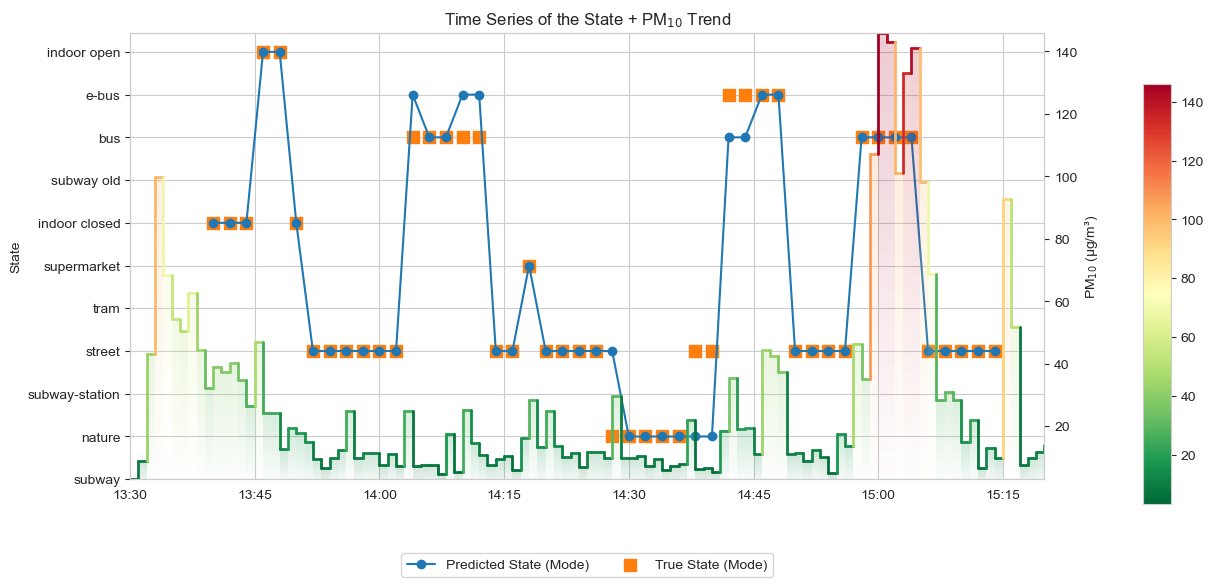

merged_df_filtered range: 2025-02-18 13:40:00 2025-02-18 15:14:00
df_pm10_filtered range: 2025-02-18 13:30:00 2025-02-18 15:20:00


In [2]:
# Label-Mapping
label_mapping = {
    "vehicle in subway": 0,
    "outdoor in nature": 1,
    "indoor in subway-station": 2,
    "outdoor on foot": 3,
    "vehicle in tram": 4,
    "indoor in supermarket": 5,
    "indoor with window closed": 6,
    "vehicle in subway (old)": 7,
    "vehicle in bus": 8,
    "vehicle in e-bus": 9,
    "indoor with window open": 10
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

# Kurze Bezeichnungen (Anpassung nach Bedarf)
short_label_mapping = {
    "vehicle in subway": "subway",
    "outdoor on foot": "street",
    "indoor in supermarket": "supermarket",
    "vehicle in tram": "tram",
    "indoor with window closed": "indoor closed",
    "indoor in subway-station": "subway-station",
    "vehicle in subway (old)": "subway old",
    "vehicle in bus": "bus",
    "vehicle in e-bus": "e-bus",
    "outdoor in nature": "nature",
    "indoor with window open": "indoor open"
}

# 1.1) Lade die Predictions-CSV
df = pd.read_csv(CSV_PATH, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['status_gt'] = df['status_gt'].astype(str).str.strip().str.lower()

# Bestimme die Feature-Spalten
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# 1.2) Lade das Keras Model
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# 1.3) Führe Inferenz für jede Zeile durch (5-Sekunden Intervalle)
predictions = []
num_rows = len(df)
for i in range(num_rows):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# 1.4) Aggregiere Predictions pro 2 Minuten
pred_df['minute'] = pred_df['timestamp'].dt.floor('2min')
pred_minute = pred_df.groupby('minute').agg(
    pred_mode_class=pd.NamedAgg(column='pred_mode_class', aggfunc=lambda x: x.mode().iloc[0]),
    avg_confidence=pd.NamedAgg(column='confidence', aggfunc='mean')
).reset_index()

# 1.5) True Values (ebenfalls pro 2 Minuten)
df['true_status_num'] = df['status_gt'].map(label_mapping)
true_minute = df.groupby(df['timestamp'].dt.floor('2min')).agg(
    true_mode_status=pd.NamedAgg(
        column='true_status_num',
        aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
).reset_index().rename(columns={'timestamp': 'minute'})

# 1.6) Merge
merged_df = pd.merge(pred_minute, true_minute, on='minute', how='inner')
print("Merged dataframe head:")
print(merged_df.head())

# 1.7) PM10 Daten laden (statt CO₂)
df_pm10 = pd.read_csv(PM10_CSV_PATH, parse_dates=["Time"]).sort_values(by="Time")

# Für spätere Filterung
times_pm10_all = df_pm10["Time"].to_numpy()
vals_pm10_all  = df_pm10["pm10"].to_numpy()

# ------------------------------------------
# MANUAL START TIME
# ------------------------------------------

# Filtere merged_df auf Daten nach der manuellen Startzeit
merged_df_filtered = merged_df[merged_df['minute'] >= manual_start_time]

# Filtere auch die PM10-Daten entsprechend
df_pm10_filtered = df_pm10[df_pm10['Time'] >= manual_start_time]
times_pm10 = df_pm10_filtered["Time"].to_numpy()
vals_pm10  = df_pm10_filtered["pm10"].to_numpy()

# ------------------------------------------
# 2) Plot: 1 Subplot (Klassen + PM10)
# ------------------------------------------
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# (A) Predicted vs. True Class (linke Achse)
ax1.plot(
    merged_df_filtered['minute'],
    merged_df_filtered['pred_mode_class'],
    marker='o', linestyle='-', color='tab:blue',
    label='Predicted State (Mode)'
)
ax1.scatter(
    merged_df_filtered['minute'],
    merged_df_filtered['true_mode_status'],
    color='tab:orange', marker='s', s=80,
    label='True State (Mode)'
)

ax1.set_ylabel("State")
ax1.set_title("Time Series of the State + PM$_{10}$ Trend")

# Legende (optional) unten platzieren
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)

# Y-Ticks für Klassen 0..10
all_classes = sorted(label_mapping.values())
ax1.set_yticks(all_classes)
ax1.set_yticklabels([
    short_label_mapping.get(inv_label_mapping.get(cls, "Unknown"), "Unknown")
    for cls in all_classes
])

# (B) PM10 Daten auf der rechten Achse
ax_pm10 = ax1.twinx()  # zweite y-Achse für PM10
ax_pm10.grid(False)

if len(times_pm10) > 0:
    # Dynamische Farbskala: min -> max
    min_val = vals_pm10.min()
    max_val = vals_pm10.max()
    # Falls du feste Grenzen möchtest, setze hier z.B. norm = plt.Normalize(0, 200)
    norm = plt.Normalize(min_val, max_val)
    cmap = plt.get_cmap("RdYlGn_r")

    # Y-Achse für PM10 (optional kannst du fest 0..200 o.Ä. setzen)
    ax_pm10.set_ylim(min_val, max_val)

    n_stripes = 25

    # Step-Plot mit pseudo-Gradient
    for i in range(len(vals_pm10) - 1):
        x1_ = times_pm10[i]
        x2_ = times_pm10[i+1]
        y1_ = vals_pm10[i]
        y2_ = vals_pm10[i+1]

        # 1) Horizontale Linie
        color_h = cmap(norm(y1_))
        ax_pm10.plot([x1_, x2_], [y1_, y1_], color=color_h, linewidth=2)

        # 2) Vertikale Linie
        color_v = cmap(norm(y2_))
        ax_pm10.plot([x2_, x2_], [y1_, y2_], color=color_v, linewidth=2)

        # 3) Füllung (Streifen)
        bottom_level = 0  # Start ggf. bei 0
        top_level = y1_
        # Falls du harte Grenzen willst, z.B. top_level = min(y1_, 200)
        levels = np.linspace(bottom_level, top_level, n_stripes + 1)
        for s in range(n_stripes):
            bottom = levels[s]
            top = levels[s+1]
            alpha_val = 0.2 * ((s+1)/n_stripes)
            ax_pm10.fill_between(
                [x1_, x2_], top, bottom,
                facecolor=color_h, alpha=alpha_val,
                edgecolor='none'
            )

    ax_pm10.set_ylabel("PM$_{10}$ (µg/m³)")
else:
    print("No PM10 data available after manual_start_time.")
    ax_pm10.set_ylabel("PM$_{10}$ (µg/m³)")

# ------------------------------------------
# 3) Layout / X-Axis Format & Colorbar
# ------------------------------------------
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# ------------------------------------------------
# (A) Begrenze hier den Plot-Zeitraum, z.B. 16:20–17:20
# ------------------------------------------------
ax1.set_xlim(start_plot, end_plot)

# (1) Passe das Layout an (maximal 80% der Breite)
fig.tight_layout(rect=[0, 0, 0.8, 1])

# (2) Separate Achse für die Colorbar (rechts)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])

# (3) Erstelle die Colorbar
if len(times_pm10) > 0:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
else:
    sm = plt.cm.ScalarMappable()
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)

# Optional: Drehe die x-Achsen-Ticks für bessere Lesbarkeit
fig.autofmt_xdate(rotation=45)

# 4) Plot speichern (PNG, 300 DPI)
plt.savefig("PM10_plot.png", dpi=300, bbox_inches="tight")

# Falls die Legende unten abgeschnitten wird, kannst du vorher:
# plt.subplots_adjust(bottom=0.3)

# 5) Zeige den Plot an
plt.show()

# ------------------------------------------
# Datencheck (optional):
# ------------------------------------------
print("merged_df_filtered range:", 
      merged_df_filtered['minute'].min(), 
      merged_df_filtered['minute'].max())
print("df_pm10_filtered range:", 
      df_pm10_filtered['Time'].min(), 
      df_pm10_filtered['Time'].max())


Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/ste

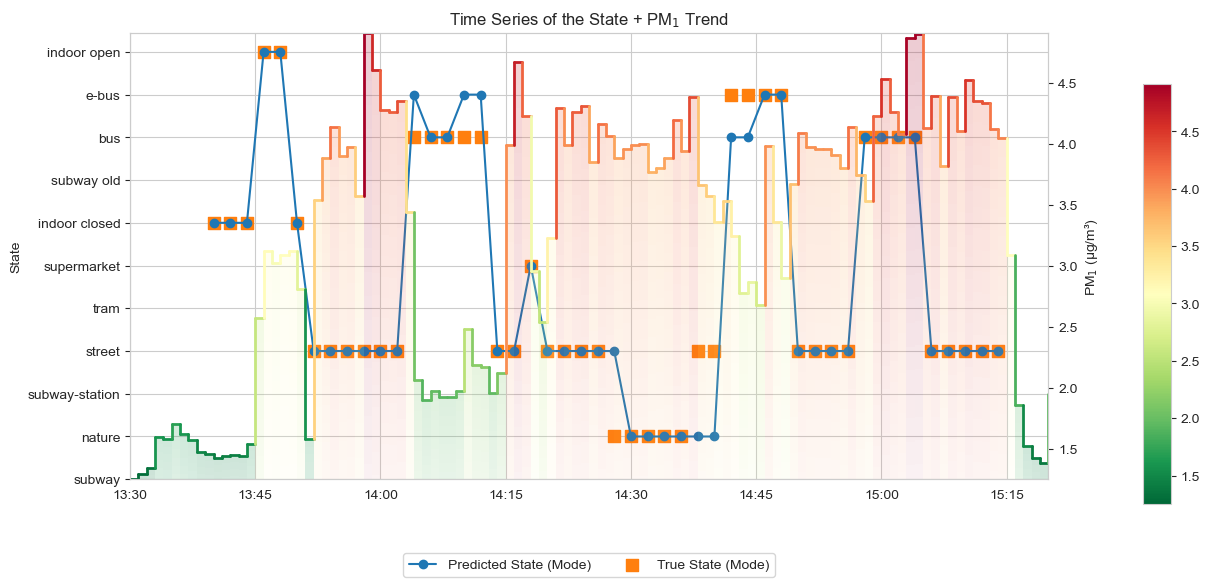

merged_df_filtered range: 2025-02-18 13:40:00 2025-02-18 15:14:00
df_pm1_filtered range: 2025-02-18 13:30:00 2025-02-18 15:20:00


In [3]:
# Label-Mapping
label_mapping = {
    "vehicle in subway": 0,
    "outdoor in nature": 1,
    "indoor in subway-station": 2,
    "outdoor on foot": 3,
    "vehicle in tram": 4,
    "indoor in supermarket": 5,
    "indoor with window closed": 6,
    "vehicle in subway (old)": 7,
    "vehicle in bus": 8,
    "vehicle in e-bus": 9,
    "indoor with window open": 10
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

# Kurze Bezeichnungen (Anpassung nach Bedarf)
short_label_mapping = {
    "vehicle in subway": "subway",
    "outdoor on foot": "street",
    "indoor in supermarket": "supermarket",
    "vehicle in tram": "tram",
    "indoor with window closed": "indoor closed",
    "indoor in subway-station": "subway-station",
    "vehicle in subway (old)": "subway old",
    "vehicle in bus": "bus",
    "vehicle in e-bus": "e-bus",
    "outdoor in nature": "nature",
    "indoor with window open": "indoor open"
}

# 1.1) Lade die Predictions-CSV
df = pd.read_csv(CSV_PATH, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['status_gt'] = df['status_gt'].astype(str).str.strip().str.lower()

# Bestimme die Feature-Spalten
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# 1.2) Lade das Keras Model
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# 1.3) Führe Inferenz für jede Zeile durch (5-Sekunden Intervalle)
predictions = []
num_rows = len(df)
for i in range(num_rows):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# 1.4) Aggregiere Predictions pro 2 Minuten
pred_df['minute'] = pred_df['timestamp'].dt.floor('2min')
pred_minute = pred_df.groupby('minute').agg(
    pred_mode_class=pd.NamedAgg(column='pred_mode_class', aggfunc=lambda x: x.mode().iloc[0]),
    avg_confidence=pd.NamedAgg(column='confidence', aggfunc='mean')
).reset_index()

# 1.5) True Values (ebenfalls pro 2 Minuten)
df['true_status_num'] = df['status_gt'].map(label_mapping)
true_minute = df.groupby(df['timestamp'].dt.floor('2min')).agg(
    true_mode_status=pd.NamedAgg(
        column='true_status_num',
        aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
).reset_index().rename(columns={'timestamp': 'minute'})

# 1.6) Merge
merged_df = pd.merge(pred_minute, true_minute, on='minute', how='inner')
print("Merged dataframe head:")
print(merged_df.head())

# 1.7) PM1 Daten laden (statt CO₂ oder PM10)
df_pm1 = pd.read_csv(PM1_CSV_PATH, parse_dates=["Time"]).sort_values(by="Time")
times_pm1_all = df_pm1["Time"].to_numpy()
vals_pm1_all  = df_pm1["pm1"].to_numpy()

# ------------------------------------------
# MANUAL START TIME (Beispiel)
# ------------------------------------------

# Filtere merged_df auf Daten nach der manuellen Startzeit
merged_df_filtered = merged_df[merged_df['minute'] >= manual_start_time]

# Filtere auch die PM1-Daten entsprechend
df_pm1_filtered = df_pm1[df_pm1['Time'] >= manual_start_time]
times_pm1 = df_pm1_filtered["Time"].to_numpy()
vals_pm1  = df_pm1_filtered["pm1"].to_numpy()

# ------------------------------------------
# 2) Plot: 1 Subplot (Klassen + PM1)
# ------------------------------------------
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# (A) Predicted vs. True Class (linke Achse)
ax1.plot(
    merged_df_filtered['minute'],
    merged_df_filtered['pred_mode_class'],
    marker='o', linestyle='-', color='tab:blue',
    label='Predicted State (Mode)'
)
ax1.scatter(
    merged_df_filtered['minute'],
    merged_df_filtered['true_mode_status'],
    color='tab:orange', marker='s', s=80,
    label='True State (Mode)'
)

ax1.set_ylabel("State")
ax1.set_title("Time Series of the State + PM$_{1}$ Trend")

# Legende (optional) unten platzieren
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)

# Y-Ticks für Klassen 0..10
all_classes = sorted(label_mapping.values())
ax1.set_yticks(all_classes)
ax1.set_yticklabels([
    short_label_mapping.get(inv_label_mapping.get(cls, "Unknown"), "Unknown")
    for cls in all_classes
])

# (B) PM1 Daten auf der rechten Achse
ax_pm1 = ax1.twinx()  # zweite y-Achse für PM1
ax_pm1.grid(False)

if len(times_pm1) > 0:
    # Dynamische Farbskala basierend auf min und max der PM1-Werte
    min_val = vals_pm1.min()
    max_val = vals_pm1.max()
    norm = plt.Normalize(min_val, max_val)
    cmap = plt.get_cmap("RdYlGn_r")

    # Y-Achse für PM1 (optional kannst du feste Grenzen setzen, z.B. 0..50)
    ax_pm1.set_ylim(min_val, max_val)

    n_stripes = 25

    # Step-Plot mit pseudo-Gradient
    for i in range(len(vals_pm1) - 1):
        x1_ = times_pm1[i]
        x2_ = times_pm1[i+1]
        y1_ = vals_pm1[i]
        y2_ = vals_pm1[i+1]

        # 1) Horizontale Linie
        color_h = cmap(norm(y1_))
        ax_pm1.plot([x1_, x2_], [y1_, y1_], color=color_h, linewidth=2)

        # 2) Vertikale Linie
        color_v = cmap(norm(y2_))
        ax_pm1.plot([x2_, x2_], [y1_, y2_], color=color_v, linewidth=2)

        # 3) Füllung (Streifen) ab 0
        bottom_level = 0
        top_level = y1_
        levels = np.linspace(bottom_level, top_level, n_stripes + 1)
        for s in range(n_stripes):
            bottom = levels[s]
            top = levels[s+1]
            alpha_val = 0.2 * ((s+1)/n_stripes)
            ax_pm1.fill_between(
                [x1_, x2_], top, bottom,
                facecolor=color_h, alpha=alpha_val,
                edgecolor='none'
            )

    ax_pm1.set_ylabel("PM$_{1}$ (µg/m³)")
else:
    print("No PM1 data available after manual_start_time.")
    ax_pm1.set_ylabel("PM$_{1}$ (µg/m³)")

# ------------------------------------------
# 3) Layout / X-Axis Format & Colorbar
# ------------------------------------------
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# ------------------------------------------------
# Begrenze hier den Plot-Zeitraum, z.B. 16:20–17:20
# ----------------------------------------------
ax1.set_xlim(start_plot, end_plot)

# (1) Passe das Layout an (maximal 80% der Breite)
fig.tight_layout(rect=[0, 0, 0.8, 1])

# (2) Separate Achse für die Colorbar (rechts)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])

# (3) Erstelle die Colorbar
if len(times_pm1) > 0:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
else:
    sm = plt.cm.ScalarMappable()
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)

# Optional: Drehe die x-Achsen-Ticks für bessere Lesbarkeit
fig.autofmt_xdate(rotation=45)

# 4) Plot speichern (PNG, 300 DPI)
plt.savefig("PM1_plot.png", dpi=300, bbox_inches="tight")

# Falls die Legende unten abgeschnitten wird, kannst du vorher:
# plt.subplots_adjust(bottom=0.3)

# 5) Zeige den Plot an
plt.show()

# ------------------------------------------
# Datencheck (optional):
# ------------------------------------------
print("merged_df_filtered range:", 
      merged_df_filtered['minute'].min(), 
      merged_df_filtered['minute'].max())
print("df_pm1_filtered range:", 
      df_pm1_filtered['Time'].min(), 
      df_pm1_filtered['Time'].max())


Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━

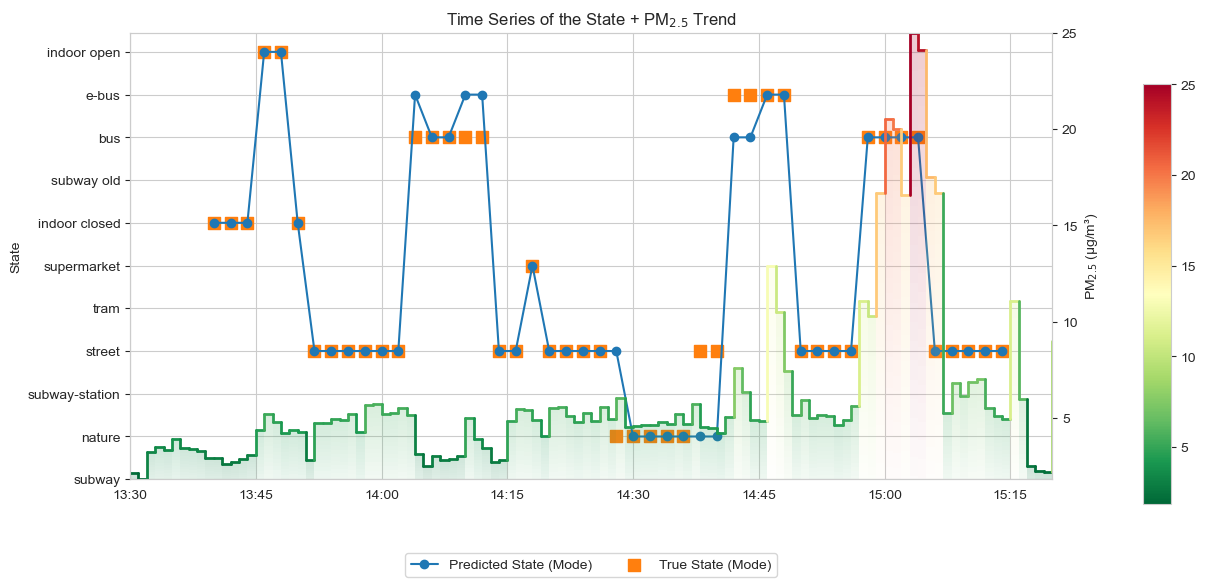

merged_df_filtered range: 2025-02-18 13:40:00 2025-02-18 15:14:00
df_pm25_filtered range: 2025-02-18 13:30:00 2025-02-18 15:20:00


In [4]:
# Label-Mapping
label_mapping = {
    "vehicle in subway": 0,
    "outdoor in nature": 1,
    "indoor in subway-station": 2,
    "outdoor on foot": 3,
    "vehicle in tram": 4,
    "indoor in supermarket": 5,
    "indoor with window closed": 6,
    "vehicle in subway (old)": 7,
    "vehicle in bus": 8,
    "vehicle in e-bus": 9,
    "indoor with window open": 10
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

# Kurze Bezeichnungen (Anpassung nach Bedarf)
short_label_mapping = {
    "vehicle in subway": "subway",
    "outdoor on foot": "street",
    "indoor in supermarket": "supermarket",
    "vehicle in tram": "tram",
    "indoor with window closed": "indoor closed",
    "indoor in subway-station": "subway-station",
    "vehicle in subway (old)": "subway old",
    "vehicle in bus": "bus",
    "vehicle in e-bus": "e-bus",
    "outdoor in nature": "nature",
    "indoor with window open": "indoor open"
}

# 1.1) Lade die Predictions-CSV
df = pd.read_csv(CSV_PATH, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['status_gt'] = df['status_gt'].astype(str).str.strip().str.lower()

# Bestimme die Feature-Spalten
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# 1.2) Lade das Keras Model
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# 1.3) Führe Inferenz für jede Zeile durch (5-Sekunden Intervalle)
predictions = []
num_rows = len(df)
for i in range(num_rows):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# 1.4) Aggregiere Predictions pro 2 Minuten
pred_df['minute'] = pred_df['timestamp'].dt.floor('2min')
pred_minute = pred_df.groupby('minute').agg(
    pred_mode_class=pd.NamedAgg(column='pred_mode_class', aggfunc=lambda x: x.mode().iloc[0]),
    avg_confidence=pd.NamedAgg(column='confidence', aggfunc='mean')
).reset_index()

# 1.5) True Values (ebenfalls pro 2 Minuten)
df['true_status_num'] = df['status_gt'].map(label_mapping)
true_minute = df.groupby(df['timestamp'].dt.floor('2min')).agg(
    true_mode_status=pd.NamedAgg(
        column='true_status_num',
        aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
).reset_index().rename(columns={'timestamp': 'minute'})

# 1.6) Merge
merged_df = pd.merge(pred_minute, true_minute, on='minute', how='inner')
print("Merged dataframe head:")
print(merged_df.head())

# 1.7) PM2.5 Daten laden
df_pm25 = pd.read_csv(PM25_CSV_PATH, parse_dates=["Time"]).sort_values(by="Time")
times_pm25_all = df_pm25["Time"].to_numpy()
vals_pm25_all  = df_pm25["pm2.5"].to_numpy()

# Filtere merged_df auf Daten nach der manuellen Startzeit
merged_df_filtered = merged_df[merged_df['minute'] >= manual_start_time]

# Filtere auch die PM2.5-Daten entsprechend
df_pm25_filtered = df_pm25[df_pm25['Time'] >= manual_start_time]
times_pm25 = df_pm25_filtered["Time"].to_numpy()
vals_pm25  = df_pm25_filtered["pm2.5"].to_numpy()

# ------------------------------------------
# 2) Plot: 1 Subplot (Klassen + PM2.5)
# ------------------------------------------
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# (A) Predicted vs. True Class (linke Achse)
ax1.plot(
    merged_df_filtered['minute'],
    merged_df_filtered['pred_mode_class'],
    marker='o', linestyle='-', color='tab:blue',
    label='Predicted State (Mode)'
)
ax1.scatter(
    merged_df_filtered['minute'],
    merged_df_filtered['true_mode_status'],
    color='tab:orange', marker='s', s=80,
    label='True State (Mode)'
)

ax1.set_ylabel("State")
ax1.set_title("Time Series of the State + PM$_{2.5}$ Trend")

# Legende (optional) unten platzieren
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)

# Y-Ticks für Klassen 0..10
all_classes = sorted(label_mapping.values())
ax1.set_yticks(all_classes)
ax1.set_yticklabels([
    short_label_mapping.get(inv_label_mapping.get(cls, "Unknown"), "Unknown")
    for cls in all_classes
])

# (B) PM2.5 Daten auf der rechten Achse
ax_pm25 = ax1.twinx()  # zweite y-Achse für PM2.5
ax_pm25.grid(False)

if len(times_pm25) > 0:
    # Dynamische Farbskala: min -> max der PM2.5-Werte
    min_val = vals_pm25.min()
    max_val = vals_pm25.max()
    norm = plt.Normalize(min_val, max_val)
    cmap = plt.get_cmap("RdYlGn_r")

    # Y-Achse für PM2.5 (optional feste Grenzen, z.B. 0..100)
    ax_pm25.set_ylim(min_val, max_val)

    n_stripes = 25

    # Step-Plot mit pseudo-Gradient
    for i in range(len(vals_pm25) - 1):
        x1_ = times_pm25[i]
        x2_ = times_pm25[i+1]
        y1_ = vals_pm25[i]
        y2_ = vals_pm25[i+1]

        # 1) Horizontale Linie
        color_h = cmap(norm(y1_))
        ax_pm25.plot([x1_, x2_], [y1_, y1_], color=color_h, linewidth=2)

        # 2) Vertikale Linie
        color_v = cmap(norm(y2_))
        ax_pm25.plot([x2_, x2_], [y1_, y2_], color=color_v, linewidth=2)

        # 3) Füllung (Streifen) ab 0
        bottom_level = 0
        top_level = y1_
        levels = np.linspace(bottom_level, top_level, n_stripes + 1)
        for s in range(n_stripes):
            bottom = levels[s]
            top = levels[s+1]
            alpha_val = 0.2 * ((s+1)/n_stripes)
            ax_pm25.fill_between(
                [x1_, x2_], top, bottom,
                facecolor=color_h, alpha=alpha_val,
                edgecolor='none'
            )

    ax_pm25.set_ylabel("PM$_{2.5}$ (µg/m³)")
else:
    print("No PM2.5 data available after manual_start_time.")
    ax_pm25.set_ylabel("PM$_{2.5}$ (µg/m³)")

# ------------------------------------------
# 3) Layout / X-Axis Format & Colorbar
# ------------------------------------------
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# ------------------------------------------------
# Begrenze hier den Plot-Zeitraum, z.B. 16:20–17:20
# ------------------------------------------------

ax1.set_xlim(start_plot, end_plot)

# (1) Passe das Layout an (maximal 80% der Breite)
fig.tight_layout(rect=[0, 0, 0.8, 1])

# (2) Separate Achse für die Colorbar (rechts)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])

# (3) Erstelle die Colorbar
if len(times_pm25) > 0:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
else:
    sm = plt.cm.ScalarMappable()
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)

# Optional: Drehe die x-Achsen-Ticks für bessere Lesbarkeit
fig.autofmt_xdate(rotation=45)

# 4) Plot speichern (PNG, 300 DPI)
plt.savefig("PM2.5_plot.png", dpi=300, bbox_inches="tight")

# Falls die Legende unten abgeschnitten wird, kannst du vorher:
# plt.subplots_adjust(bottom=0.3)

# 5) Zeige den Plot an
plt.show()

# ------------------------------------------
# Datencheck (optional):
# ------------------------------------------
print("merged_df_filtered range:", 
      merged_df_filtered['minute'].min(), 
      merged_df_filtered['minute'].max())
print("df_pm25_filtered range:", 
      df_pm25_filtered['Time'].min(), 
      df_pm25_filtered['Time'].max())


Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


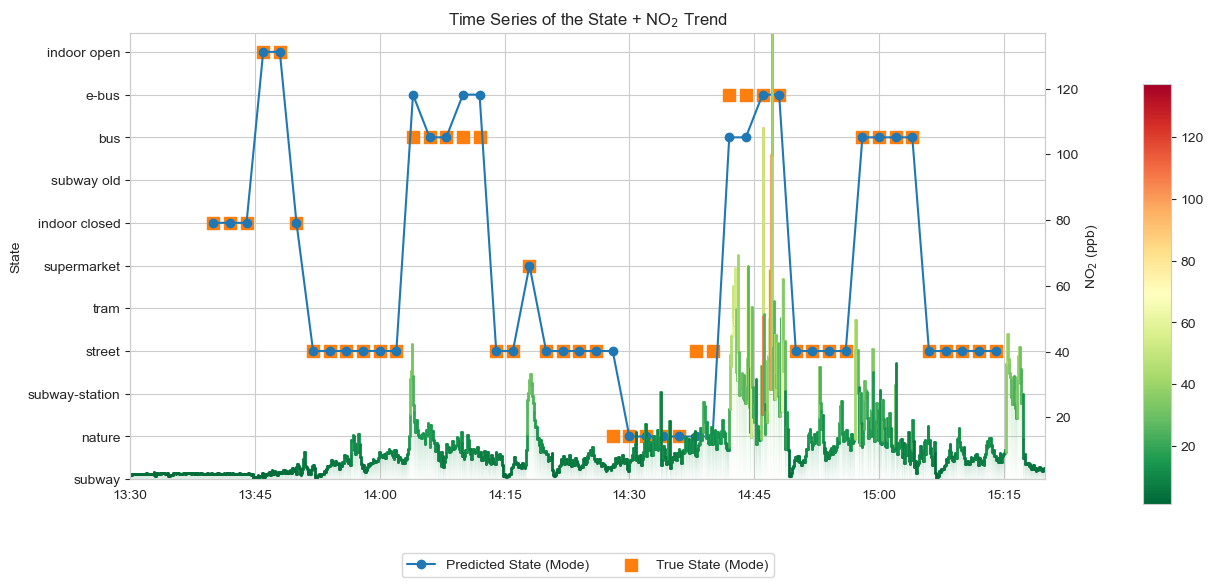

merged_df_filtered range: 2025-02-18 13:40:00 2025-02-18 15:14:00
df_no2_filtered range: 2025-02-18 13:30:00 2025-02-18 15:20:00


In [5]:
# Label-Mapping
label_mapping = {
    "vehicle in subway": 0,
    "outdoor in nature": 1,
    "indoor in subway-station": 2,
    "outdoor on foot": 3,
    "vehicle in tram": 4,
    "indoor in supermarket": 5,
    "indoor with window closed": 6,
    "vehicle in subway (old)": 7,
    "vehicle in bus": 8,
    "vehicle in e-bus": 9,
    "indoor with window open": 10
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

# Kurze Bezeichnungen (Anpassung nach Bedarf)
short_label_mapping = {
    "vehicle in subway": "subway",
    "outdoor on foot": "street",
    "indoor in supermarket": "supermarket",
    "vehicle in tram": "tram",
    "indoor with window closed": "indoor closed",
    "indoor in subway-station": "subway-station",
    "vehicle in subway (old)": "subway old",
    "vehicle in bus": "bus",
    "vehicle in e-bus": "e-bus",
    "outdoor in nature": "nature",
    "indoor with window open": "indoor open"
}

# 1.1) Lade die Predictions-CSV
df = pd.read_csv(CSV_PATH, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['status_gt'] = df['status_gt'].astype(str).str.strip().str.lower()

# Bestimme die Feature-Spalten
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# 1.2) Lade das Keras Model
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# 1.3) Führe Inferenz für jede Zeile durch (5-Sekunden Intervalle)
predictions = []
num_rows = len(df)
for i in range(num_rows):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# 1.4) Aggregiere Predictions pro 2 Minuten
pred_df['minute'] = pred_df['timestamp'].dt.floor('2min')
pred_minute = pred_df.groupby('minute').agg(
    pred_mode_class=pd.NamedAgg(column='pred_mode_class', aggfunc=lambda x: x.mode().iloc[0]),
    avg_confidence=pd.NamedAgg(column='confidence', aggfunc='mean')
).reset_index()

# 1.5) True Values (ebenfalls pro 2 Minuten)
df['true_status_num'] = df['status_gt'].map(label_mapping)
true_minute = df.groupby(df['timestamp'].dt.floor('2min')).agg(
    true_mode_status=pd.NamedAgg(
        column='true_status_num',
        aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
).reset_index().rename(columns={'timestamp': 'minute'})

# 1.6) Merge
merged_df = pd.merge(pred_minute, true_minute, on='minute', how='inner')
print("Merged dataframe head:")
print(merged_df.head())

# 1.7) NO2-Daten laden
df_no2 = pd.read_csv(NO2_CSV_PATH, parse_dates=["Time"]).sort_values(by="Time")
times_no2_all = df_no2["Time"].to_numpy()
vals_no2_all  = df_no2["no2_aq10"].to_numpy()

# Filtere merged_df auf Daten nach der manuellen Startzeit
merged_df_filtered = merged_df[merged_df['minute'] >= manual_start_time]

# Filtere auch die NO2-Daten entsprechend
df_no2_filtered = df_no2[df_no2['Time'] >= manual_start_time]
times_no2 = df_no2_filtered["Time"].to_numpy()
vals_no2  = df_no2_filtered["no2_aq10"].to_numpy()

# ------------------------------------------
# 2) Plot: 1 Subplot (Klassen + NO2)
# ------------------------------------------
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# (A) Predicted vs. True Class (linke Achse)
ax1.plot(
    merged_df_filtered['minute'],
    merged_df_filtered['pred_mode_class'],
    marker='o', linestyle='-', color='tab:blue',
    label='Predicted State (Mode)'
)
ax1.scatter(
    merged_df_filtered['minute'],
    merged_df_filtered['true_mode_status'],
    color='tab:orange', marker='s', s=80,
    label='True State (Mode)'
)

ax1.set_ylabel("State")
ax1.set_title("Time Series of the State + NO$_2$ Trend")

# Legende (optional) unten platzieren
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2
)

# Y-Ticks für Klassen 0..10
all_classes = sorted(label_mapping.values())
ax1.set_yticks(all_classes)
ax1.set_yticklabels([
    short_label_mapping.get(inv_label_mapping.get(cls, "Unknown"), "Unknown")
    for cls in all_classes
])

# (B) NO2-Daten auf der rechten Achse
ax_no2 = ax1.twinx()  # zweite y-Achse für NO2
ax_no2.grid(False)

if len(times_no2) > 0:
    # Dynamische Farbskala: min -> max der NO2-Werte
    min_val = vals_no2.min()
    max_val = vals_no2.max()
    norm = plt.Normalize(min_val, max_val)
    cmap = plt.get_cmap("RdYlGn_r")

    # Y-Achse für NO2 (optional feste Grenzen)
    ax_no2.set_ylim(min_val, max_val)

    n_stripes = 25

    # Step-Plot mit pseudo-Gradient
    for i in range(len(vals_no2) - 1):
        x1_ = times_no2[i]
        x2_ = times_no2[i+1]
        y1_ = vals_no2[i]
        y2_ = vals_no2[i+1]

        # 1) Horizontale Linie
        color_h = cmap(norm(y1_))
        ax_no2.plot([x1_, x2_], [y1_, y1_], color=color_h, linewidth=2)

        # 2) Vertikale Linie
        color_v = cmap(norm(y2_))
        ax_no2.plot([x2_, x2_], [y1_, y2_], color=color_v, linewidth=2)

        # 3) Füllung (Streifen) ab 0
        bottom_level = 0
        top_level = y1_
        levels = np.linspace(bottom_level, top_level, n_stripes + 1)
        for s in range(n_stripes):
            bottom = levels[s]
            top = levels[s+1]
            alpha_val = 0.2 * ((s+1)/n_stripes)
            ax_no2.fill_between(
                [x1_, x2_], top, bottom,
                facecolor=color_h, alpha=alpha_val,
                edgecolor='none'
            )

    ax_no2.set_ylabel("NO$_2$ (ppb)")  # ggf. Einheit anpassen
else:
    print("No NO2 data available after manual_start_time.")
    ax_no2.set_ylabel("NO$_2$ (ppb)")

# ------------------------------------------
# 3) Layout / X-Axis Format & Colorbar
# ------------------------------------------
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax1.set_xlim(start_plot, end_plot)

# (1) Passe das Layout an (maximal 80% der Breite)
fig.tight_layout(rect=[0, 0, 0.8, 1])

# (2) Separate Achse für die Colorbar (rechts)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])

# (3) Erstelle die Colorbar
if len(times_no2) > 0:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
else:
    sm = plt.cm.ScalarMappable()
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)

# Optional: Drehe die x-Achsen-Ticks für bessere Lesbarkeit
fig.autofmt_xdate(rotation=45)

# 4) Plot speichern (PNG, 300 DPI)
plt.savefig("NO2_plot.png", dpi=300, bbox_inches="tight")

# Falls die Legende unten abgeschnitten wird, kannst du vorher:
# plt.subplots_adjust(bottom=0.3)

# 5) Zeige den Plot an
plt.show()

# ------------------------------------------
# Datencheck (optional):
# ------------------------------------------
print("merged_df_filtered range:", 
      merged_df_filtered['minute'].min(), 
      merged_df_filtered['minute'].max())
print("df_no2_filtered range:", 
      df_no2_filtered['Time'].min(), 
      df_no2_filtered['Time'].max())


Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/

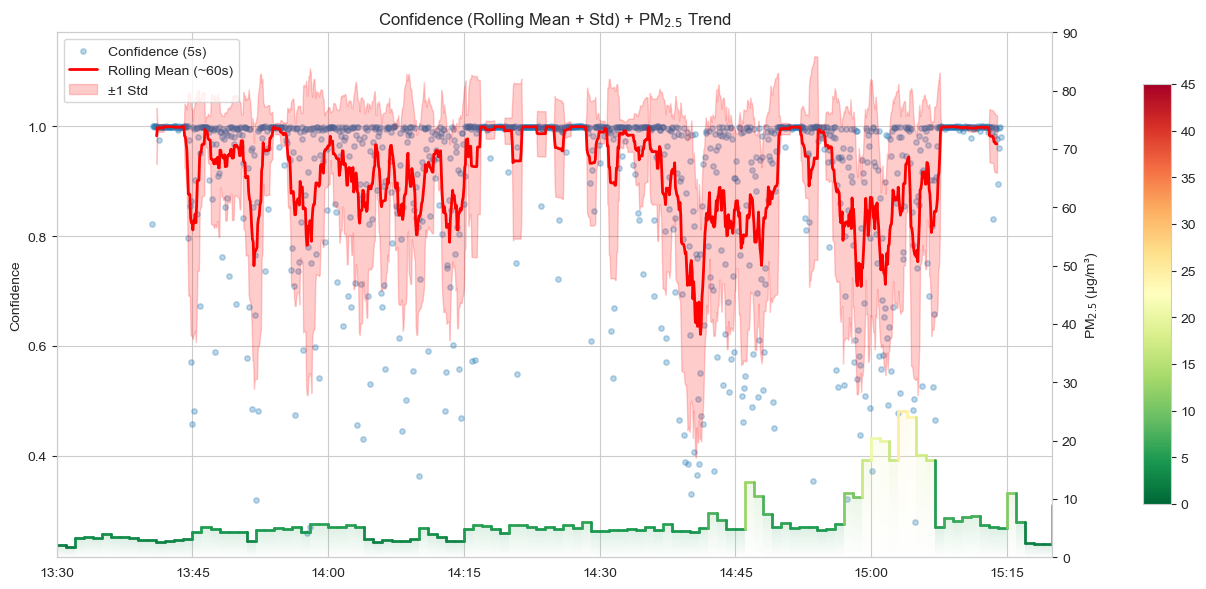

Datenbereich pred_df_filtered: 2025-02-18 13:40:33 2025-02-18 15:14:19
Datenbereich df_pm25_filtered: 2025-02-18 13:30:00 2025-02-18 15:20:00


In [6]:
# 1.1) Predictions-CSV laden
df = pd.read_csv(CSV_PATH, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Features bestimmen
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# 1.2) Keras-Modell laden
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# 1.3) Inferenz (5-Sekunden-Intervalle)
predictions = []
for i in range(len(df)):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# 1.7) PM2.5-Daten laden
df_pm25 = pd.read_csv(PM25_CSV_PATH, parse_dates=["Time"]).sort_values(by="Time")

# -------------------------------------------------
# 2) Daten filtern / Rolling Mean & Std
# -------------------------------------------------

# (A) Confidence filtern und Rolling-Statistiken
pred_df_filtered = pred_df[pred_df['timestamp'] >= manual_start_time].copy()

# Rolling Mean/Std (Fenster 12 ≈ 60 Sek, wenn alle 5s ein Wert)
pred_df_filtered['confidence_smooth'] = pred_df_filtered['confidence'].rolling(window=12, center=True).mean()
pred_df_filtered['confidence_std']    = pred_df_filtered['confidence'].rolling(window=12, center=True).std()

# (B) PM2.5 filtern
df_pm25_filtered = df_pm25[df_pm25['Time'] >= manual_start_time].copy()
times_pm25 = df_pm25_filtered["Time"].to_numpy()
vals_pm25  = df_pm25_filtered["pm2.5"].to_numpy()

# -------------------------------------------------
# 3) Plot: Confidence (links) + PM2.5 (rechts)
# -------------------------------------------------
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# --- (A) Confidence Scatter + Rolling Mean/Std auf linker Achse ---
# Scatter: alle 5s Confidence (halbtransparent)
ax1.scatter(
    pred_df_filtered['timestamp'],
    pred_df_filtered['confidence'],
    color='tab:blue', marker='o', s=15, alpha=0.3,
    label='Confidence (5s)'
)

# Rolling Mean (rote Linie)
ax1.plot(
    pred_df_filtered['timestamp'],
    pred_df_filtered['confidence_smooth'],
    color='red', linewidth=2, label='Rolling Mean (~60s)'
)

# ±1 Std (Füllung)
ax1.fill_between(
    pred_df_filtered['timestamp'],
    pred_df_filtered['confidence_smooth'] - pred_df_filtered['confidence_std'],
    pred_df_filtered['confidence_smooth'] + pred_df_filtered['confidence_std'],
    color='red', alpha=0.2, label='±1 Std'
)

ax1.set_ylabel("Confidence")
ax1.set_title("Confidence (Rolling Mean + Std) + PM$_{2.5}$ Trend")

# Legende
ax1.legend(loc='upper left')

# --- (B) PM2.5 auf rechter Achse (Gradient-Plot) ---
ax_pm25 = ax1.twinx()
ax_pm25.grid(False)

if len(times_pm25) > 1:
    cmap = plt.get_cmap("RdYlGn_r")
    # Farbskala z.B. 0..45 (anpassen!)
    norm = plt.Normalize(0, 45)

    # ACHSE: z.B. 0..90, damit Werte bis 90 sichtbar sind
    ax_pm25.set_ylim(0, 90)

    n_stripes = 25
    for i in range(len(vals_pm25) - 1):
        x1_ = times_pm25[i]
        x2_ = times_pm25[i+1]
        y1_ = vals_pm25[i]
        y2_ = vals_pm25[i+1]

        # Farbe deckeln bei 45
        color_h = cmap(norm(min(y1_, 45)))
        color_v = cmap(norm(min(y2_, 45)))

        # Horizontale Linie
        ax_pm25.plot([x1_, x2_], [y1_, y1_], color=color_h, linewidth=2, zorder=2)

        # Vertikale Linie
        ax_pm25.plot([x2_, x2_], [y1_, y2_], color=color_v, linewidth=2, zorder=2)

        # Füllung (Streifen)
        bottom_level = 0
        top_level = y1_
        if top_level < 0:
            top_level = 0

        # (Werte > 90 werden nicht sichtbar, da Achse bis 90)
        levels = np.linspace(bottom_level, top_level, n_stripes + 1)
        for s in range(n_stripes):
            bottom = levels[s]
            top = levels[s+1]
            alpha_val = 0.15 * ((s+1)/n_stripes)
            ax_pm25.fill_between(
                [x1_, x2_], top, bottom,
                facecolor=color_h, alpha=alpha_val,
                edgecolor='none',
                zorder=1
            )

    ax_pm25.set_ylabel("PM$_{2.5}$ (µg/m³)")  # Einheit ggf. anpassen
else:
    print("No PM2.5 data available after manual_start_time.")
    ax_pm25.set_ylabel("PM$_{2.5}$ (µg/m³)")

# -------------------------------------------------
# 4) Layout: X-Achse, Zeitfenster, Colorbar
# -------------------------------------------------
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax1.set_xlim(start_plot, end_plot)

fig.tight_layout(rect=[0, 0, 0.8, 1])

# Colorbar (rechts)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
if len(times_pm25) > 1:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
else:
    sm = plt.cm.ScalarMappable()
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)

# X-Achse-Ticks drehen
fig.autofmt_xdate(rotation=45)

# Plot speichern (Namen anpassen)
plt.savefig("PM25_confidence_rolling.png", dpi=300, bbox_inches="tight")

# Plot anzeigen
plt.show()

# ------------------------------------------
# Datencheck (optional):
# ------------------------------------------
print("Datenbereich pred_df_filtered:",
      pred_df_filtered['timestamp'].min(),
      pred_df_filtered['timestamp'].max())
print("Datenbereich df_pm25_filtered:",
      df_pm25_filtered['Time'].min(),
      df_pm25_filtered['Time'].max())


Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

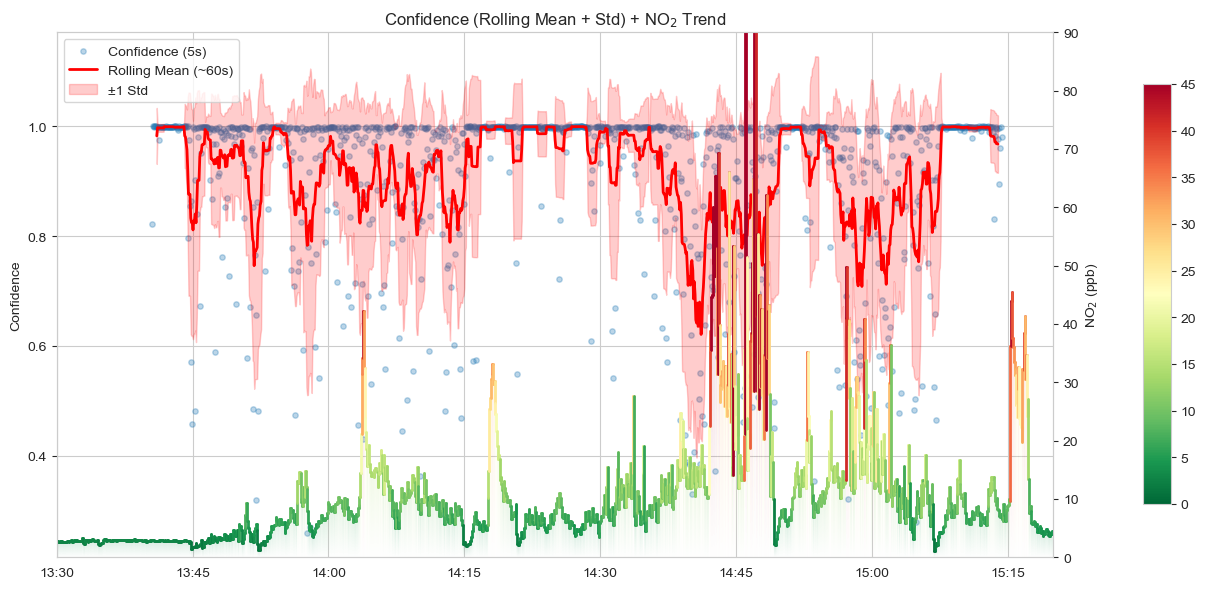

Datenbereich pred_df_filtered: 2025-02-18 13:40:33 2025-02-18 15:14:19
Datenbereich df_no2_filtered: 2025-02-18 13:30:00 2025-02-18 15:20:00


In [7]:
# 1.1) Predictions-CSV laden
df = pd.read_csv(CSV_PATH, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Features bestimmen
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# 1.2) Keras-Modell laden
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# 1.3) Inferenz (5-Sekunden-Intervalle)
predictions = []
for i in range(len(df)):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# 1.7) NO₂-Daten laden
df_no2 = pd.read_csv(NO2_CSV_PATH, parse_dates=["Time"]).sort_values(by="Time")

# -------------------------------------------------
# 2) Daten filtern / Rolling Mean & Std
# -------------------------------------------------

# (A) Confidence filtern und Rolling-Statistiken
pred_df_filtered = pred_df[pred_df['timestamp'] >= manual_start_time].copy()

# Rolling Mean/Std (Fenster 12 ≈ 60 Sek, wenn alle 5s ein Wert)
pred_df_filtered['confidence_smooth'] = pred_df_filtered['confidence'].rolling(window=12, center=True).mean()
pred_df_filtered['confidence_std']    = pred_df_filtered['confidence'].rolling(window=12, center=True).std()

# (B) NO₂ filtern
df_no2_filtered = df_no2[df_no2['Time'] >= manual_start_time].copy()
times_no2 = df_no2_filtered["Time"].to_numpy()
vals_no2  = df_no2_filtered["no2_aq10"].to_numpy()

# -------------------------------------------------
# 3) Plot: Confidence (links) + NO₂ (rechts)
# -------------------------------------------------
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

# --- (A) Confidence Scatter + Rolling Mean/Std auf linker Achse ---
# Scatter: alle 5s Confidence (halbtransparent)
ax1.scatter(
    pred_df_filtered['timestamp'],
    pred_df_filtered['confidence'],
    color='tab:blue', marker='o', s=15, alpha=0.3,
    label='Confidence (5s)'
)

# Rolling Mean (rote Linie)
ax1.plot(
    pred_df_filtered['timestamp'],
    pred_df_filtered['confidence_smooth'],
    color='red', linewidth=2, label='Rolling Mean (~60s)'
)

# ±1 Std (Füllung)
ax1.fill_between(
    pred_df_filtered['timestamp'],
    pred_df_filtered['confidence_smooth'] - pred_df_filtered['confidence_std'],
    pred_df_filtered['confidence_smooth'] + pred_df_filtered['confidence_std'],
    color='red', alpha=0.2, label='±1 Std'
)

ax1.set_ylabel("Confidence")
ax1.set_title("Confidence (Rolling Mean + Std) + NO$_2$ Trend")

# Legende
ax1.legend(loc='upper left')

# --- (B) NO₂ auf rechter Achse (Gradient-Plot) ---
ax_no2 = ax1.twinx()
ax_no2.grid(False)

if len(times_no2) > 1:
    cmap = plt.get_cmap("RdYlGn_r")
    # Farbskala 0..45
    norm = plt.Normalize(0, 45)

    # ACHSE: 0..90, damit Werte bis 90 sichtbar sind
    ax_no2.set_ylim(0, 90)

    n_stripes = 25
    for i in range(len(vals_no2) - 1):
        x1_ = times_no2[i]
        x2_ = times_no2[i+1]
        y1_ = vals_no2[i]
        y2_ = vals_no2[i+1]

        # Farbe wird bei 45 gedeckelt
        color_h = cmap(norm(min(y1_, 45)))
        color_v = cmap(norm(min(y2_, 45)))

        # Horizontale Linie
        ax_no2.plot([x1_, x2_], [y1_, y1_], color=color_h, linewidth=2, zorder=2)

        # Vertikale Linie
        ax_no2.plot([x2_, x2_], [y1_, y2_], color=color_v, linewidth=2, zorder=2)

        # Füllung (Streifen)
        bottom_level = 0  
        top_level = y1_
        if top_level < 0:
            top_level = 0

        # (Werte > 90 werden nicht sichtbar, da Achse bis 90)
        levels = np.linspace(bottom_level, top_level, n_stripes + 1)
        for s in range(n_stripes):
            bottom = levels[s]
            top = levels[s+1]
            alpha_val = 0.15 * ((s+1)/n_stripes)
            ax_no2.fill_between(
                [x1_, x2_], top, bottom,
                facecolor=color_h, alpha=alpha_val,
                edgecolor='none',
                zorder=1
            )

    ax_no2.set_ylabel("NO$_2$ (ppb)")
else:
    print("No NO2 data available after manual_start_time.")
    ax_no2.set_ylabel("NO$_2$ (ppb)")

# -------------------------------------------------
# 4) Layout: X-Achse, Zeitfenster, Colorbar
# -------------------------------------------------
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax1.set_xlim(start_plot, end_plot)

fig.tight_layout(rect=[0, 0, 0.8, 1])

# Colorbar (rechts)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
if len(times_no2) > 1:
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
else:
    sm = plt.cm.ScalarMappable()
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)

# X-Achse-Ticks drehen
fig.autofmt_xdate(rotation=45)

# Plot speichern
plt.savefig("NO2_confidence_rolling.png", dpi=300, bbox_inches="tight")

# Plot anzeigen
plt.show()

# ------------------------------------------
# Datencheck (optional):
# ------------------------------------------
print("Datenbereich pred_df_filtered:", 
      pred_df_filtered['timestamp'].min(), 
      pred_df_filtered['timestamp'].max())
print("Datenbereich df_no2_filtered:", 
      df_no2_filtered['Time'].min(), 
      df_no2_filtered['Time'].max())


Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1

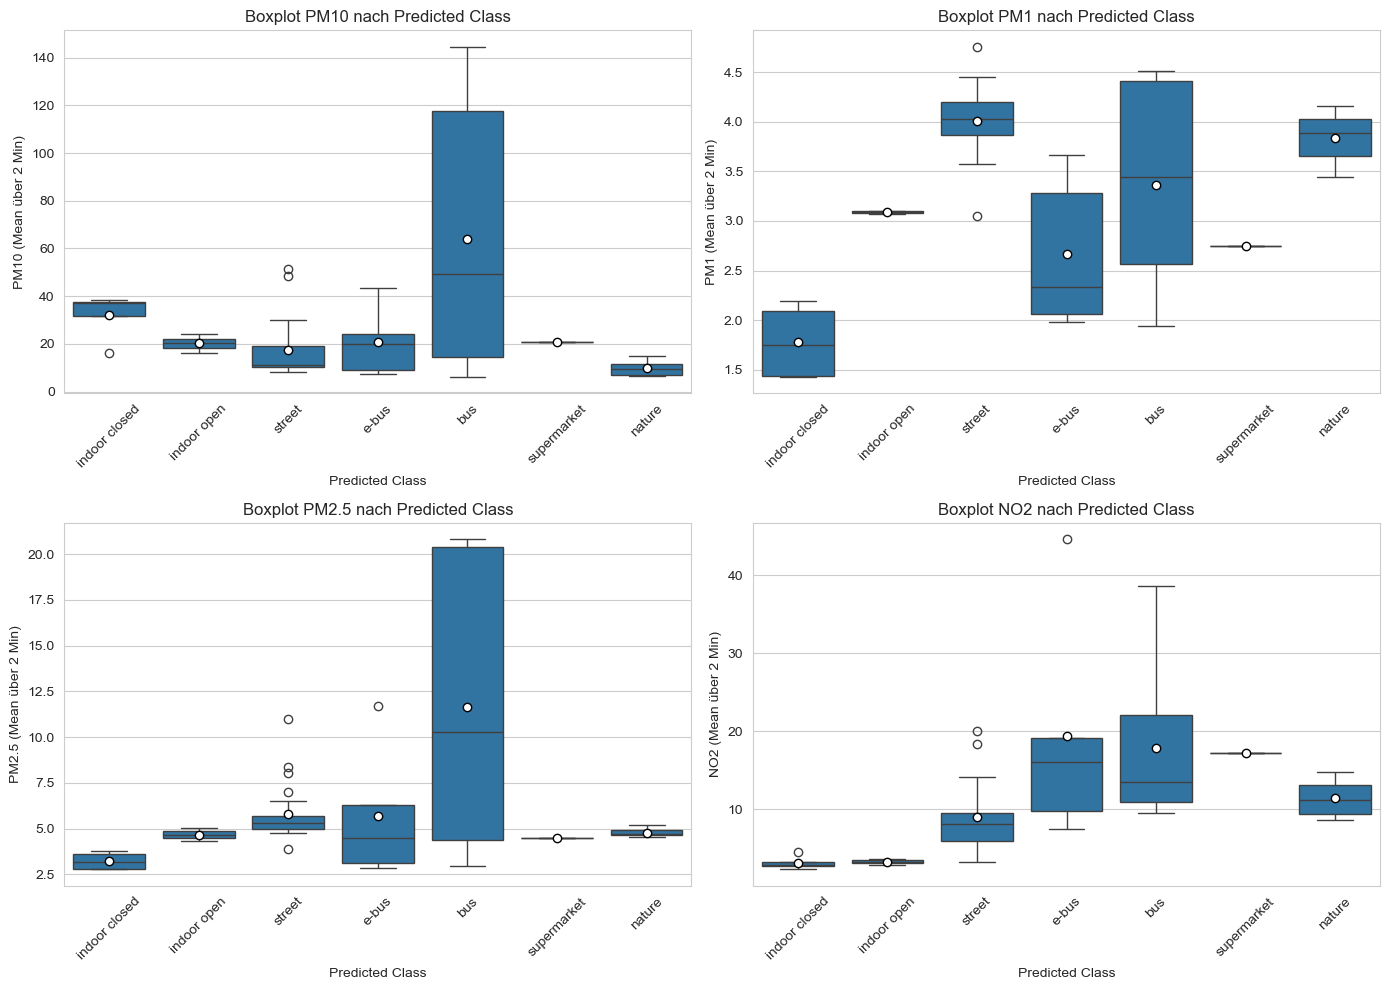


--- PM10 ---
               minute  pred_mode_class  pollutant_mean pred_mode_label
0 2025-02-18 13:40:00                6           38.25   indoor closed
1 2025-02-18 13:42:00                6           37.45   indoor closed
2 2025-02-18 13:44:00                6           36.80   indoor closed
3 2025-02-18 13:46:00               10           24.20     indoor open
4 2025-02-18 13:48:00               10           16.15     indoor open
Anzahl Zeilen: 48

--- PM1 ---
               minute  pred_mode_class  pollutant_mean pred_mode_label
0 2025-02-18 13:40:00                6           1.430   indoor closed
1 2025-02-18 13:42:00                6           1.445   indoor closed
2 2025-02-18 13:44:00                6           2.055   indoor closed
3 2025-02-18 13:46:00               10           3.070     indoor open
4 2025-02-18 13:48:00               10           3.105     indoor open
Anzahl Zeilen: 48

--- PM2.5 ---
               minute  pred_mode_class  pollutant_mean pred_mode_label

In [10]:
# Label-Mapping (wie gehabt)
label_mapping = {
    "vehicle in subway": 0,
    "outdoor in nature": 1,
    "indoor in subway-station": 2,
    "outdoor on foot": 3,
    "vehicle in tram": 4,
    "indoor in supermarket": 5,
    "indoor with window closed": 6,
    "vehicle in subway (old)": 7,
    "vehicle in bus": 8,
    "vehicle in e-bus": 9,
    "indoor with window open": 10
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

short_label_mapping = {
    "vehicle in subway":       "subway",
    "outdoor on foot":         "street",
    "indoor in supermarket":   "supermarket",
    "vehicle in tram":         "tram",
    "indoor with window closed": "indoor closed",
    "indoor in subway-station":"subway-station",
    "vehicle in subway (old)": "subway old",
    "vehicle in bus":          "bus",
    "vehicle in e-bus":        "e-bus",
    "outdoor in nature":       "nature",
    "indoor with window open": "indoor open"
}

def get_pred_mode_label(class_id):
    """Gibt eine Kurzbezeichnung der vorhergesagten Klasse zurück."""
    original_name = inv_label_mapping.get(class_id, "Unknown")
    return short_label_mapping.get(original_name, original_name)

# -------------------------------------------------
# 1) Campaign-CSV laden & Vorhersagen berechnen
# -------------------------------------------------
df = pd.read_csv(CSV_PATH_CAMPAIGN, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Feature-Spalten bestimmen
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# Keras-Modell laden
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# Inferenz im 5-Sekunden-Takt
predictions = []
for i in range(len(df)):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# Aggregation auf 2-Minuten-Basis: Modus der Vorhersage
pred_df['minute'] = pred_df['timestamp'].dt.floor('2min')
pred_minute = pred_df.groupby('minute').agg(
    pred_mode_class=pd.NamedAgg(column='pred_mode_class', aggfunc=lambda x: x.mode().iloc[0])
).reset_index()

# Filter auf Zeit >= MANUAL_START_TIME
pred_minute = pred_minute[pred_minute['minute'] >= MANUAL_START_TIME].copy()

# -------------------------------------------------
# 2) Hilfsfunktion zum Laden & Aggregieren pro 2 Min
# -------------------------------------------------
def load_and_aggregate_2min(csv_path, time_col, value_col):
    """
    Liest csv_path ein, wandelt time_col in Datetime,
    gruppiert die Werte in value_col pro 2 Minuten (Mittelwert).
    Gibt DataFrame mit Spalten [minute, pollutant_mean] zurück.
    """
    df_poll = pd.read_csv(csv_path, parse_dates=[time_col])
    df_poll = df_poll.sort_values(by=time_col)
    
    # Filter auf Startzeit
    df_poll = df_poll[df_poll[time_col] >= MANUAL_START_TIME].copy()
    
    # 2-Minuten floor
    df_poll['minute'] = df_poll[time_col].dt.floor('2min')
    
    # Mittelwert pro 2 Minuten
    df_agg = df_poll.groupby('minute')[value_col].mean().reset_index()
    df_agg.rename(columns={value_col: 'pollutant_mean'}, inplace=True)
    return df_agg

# -------------------------------------------------
# 3) Daten für alle 4 Pollutants mergen
# -------------------------------------------------
# Wir erzeugen pro Pollutant ein merged-DataFrame:
# [minute, pred_mode_class, pollutant_mean]

merged_data = {}  # key = "PM10"/"PM1"/"PM2.5"/"NO2", value = DataFrame

for pol_name, info in POLLUTANT_FILES.items():
    csv_path = info["path"]
    col_name = info["col"]
    
    # 3.1) Aggregiere pollutant pro 2 Min
    df_pol_2min = load_and_aggregate_2min(csv_path, "Time", col_name)
    
    # 3.2) Merge mit pred_minute
    merged = pd.merge(
        pred_minute,  # [minute, pred_mode_class]
        df_pol_2min,  # [minute, pollutant_mean]
        on='minute',
        how='inner'
    )
    merged_data[pol_name] = merged

# -------------------------------------------------
# 4) Boxplots pro Pollutant: pollutant_mean vs. predicted class
# -------------------------------------------------
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.flatten()  # Array für leichtere Iteration

for i, (pol_name, df_merged) in enumerate(merged_data.items()):
    ax = axs[i]
    
    # Neue Spalte mit Kurz-Labels der Vorhersageklasse
    df_merged['pred_mode_label'] = df_merged['pred_mode_class'].apply(get_pred_mode_label)
    
    # Boxplot: x = Klasse, y = pollutant_mean
    sns.boxplot(
        data=df_merged,
        x='pred_mode_label',
        y='pollutant_mean',
        ax=ax,
        showmeans=True,  # Falls du den Mean explizit zeigen möchtest
        meanprops={
            "marker":"o",
            "markerfacecolor":"white", 
            "markeredgecolor":"black",
            "markersize":"6"
        }
    )
    ax.set_title(f"Boxplot {pol_name} nach Predicted Class")
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel(f"{pol_name} (Mean über 2 Min)")
    
    # x-Ticks ggf. rotieren (falls viele Klassen)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("boxplots_pred_state_pm_no2.png", dpi=300, bbox_inches="tight")
plt.show()

# -------------------------------------------------
# 5) Optional: Kurzer Datencheck
# -------------------------------------------------
for pol_name, df_merged in merged_data.items():
    print(f"\n--- {pol_name} ---")
    print(df_merged.head())
    print("Anzahl Zeilen:", len(df_merged))


In [ ]:
# Pollutant units (adjust if necessary)
units = {
    "PM10":  "µg/m³",
    "PM1":   "µg/m³",
    "PM2.5": "µg/m³",
    "NO2":   "ppb"
}

# Label mapping
label_mapping = {
    "vehicle in subway": 0,
    "outdoor in nature": 1,
    "indoor in subway-station": 2,
    "outdoor on foot": 3,
    "vehicle in tram": 4,
    "indoor in supermarket": 5,
    "indoor with window closed": 6,
    "vehicle in subway (old)": 7,
    "vehicle in bus": 8,
    "vehicle in e-bus": 9,
    "indoor with window open": 10
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}

short_label_mapping = {
    "vehicle in subway":       "subway",
    "outdoor on foot":         "street",
    "indoor in supermarket":   "supermarket",
    "vehicle in tram":         "tram",
    "indoor with window closed": "indoor closed",
    "indoor in subway-station":"subway-station",
    "vehicle in subway (old)": "subway old",
    "vehicle in bus":          "bus",
    "vehicle in e-bus":        "e-bus",
    "outdoor in nature":       "nature",
    "indoor with window open": "indoor open"
}

def get_pred_mode_label(class_id):
    """Return a short descriptive label for the predicted class ID."""
    original_name = inv_label_mapping.get(class_id, "Unknown")
    return short_label_mapping.get(original_name, original_name)

# -------------------------------------------------
# 1) Load campaign data & compute predictions
# -------------------------------------------------
df = pd.read_csv(CSV_PATH_CAMPAIGN, delimiter=",", encoding="utf-8")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Determine feature columns
FEATURE_COLS = [col for col in df.columns if col not in ["timestamp", "status_gt"]]

# Load Keras model
model = tf.keras.models.load_model(MODEL_PATH)
print("Model successfully loaded.")

# Predict every ~5 seconds
predictions = []
for i in range(len(df)):
    input_data = {}
    for col in FEATURE_COLS:
        value = df.loc[i, col]
        if np.issubdtype(df[col].dtype, np.number):
            input_data[col] = np.array([[value]], dtype=np.float32)
        else:
            input_data[col] = tf.convert_to_tensor([[str(value)]], dtype=tf.string)
    pred = model.predict(input_data)
    prob_vector = pred[0]
    pred_class = int(np.argmax(prob_vector))
    confidence = float(prob_vector[pred_class])
    predictions.append((df.loc[i, 'timestamp'], pred_class, confidence))

pred_df = pd.DataFrame(predictions, columns=['timestamp', 'pred_mode_class', 'confidence'])

# Aggregate predictions in 2-minute intervals (take the mode of classes)
pred_df['minute'] = pred_df['timestamp'].dt.floor('2min')
pred_minute = pred_df.groupby('minute').agg(
    pred_mode_class=pd.NamedAgg(column='pred_mode_class', aggfunc=lambda x: x.mode().iloc[0])
).reset_index()

# Filter based on manual start time
pred_minute = pred_minute[pred_minute['minute'] >= MANUAL_START_TIME].copy()

# -------------------------------------------------
# 2) Helper function: Load & aggregate pollutant data
# -------------------------------------------------
def load_and_aggregate_2min(csv_path, time_col, value_col):
    """
    Reads the CSV at csv_path, converts time_col to datetime,
    groups values in value_col into 2-minute intervals (mean).
    Returns a DataFrame with columns [minute, pollutant_mean].
    """
    df_poll = pd.read_csv(csv_path, parse_dates=[time_col])
    df_poll = df_poll.sort_values(by=time_col)
    
    # Filter by manual start time
    df_poll = df_poll[df_poll[time_col] >= MANUAL_START_TIME].copy()
    
    # Floor time to 2 minutes
    df_poll['minute'] = df_poll[time_col].dt.floor('2min')
    
    # Mean over each 2-minute interval
    df_agg = df_poll.groupby('minute')[value_col].mean().reset_index()
    df_agg.rename(columns={value_col: 'pollutant_mean'}, inplace=True)
    return df_agg

# -------------------------------------------------
# 3) Merge each pollutant with predicted classes
# -------------------------------------------------
merged_data = {}  # key = "PM10"/"PM1"/"PM2.5"/"NO2", value = merged DataFrame

for pol_name, info in POLLUTANT_FILES.items():
    csv_path = info["path"]
    col_name = info["col"]
    
    # 3.1) Aggregate pollutant data in 2-minute intervals
    df_pol_2min = load_and_aggregate_2min(csv_path, "Time", col_name)
    
    # 3.2) Merge with the predicted classes
    merged = pd.merge(
        pred_minute,         # [minute, pred_mode_class]
        df_pol_2min,         # [minute, pollutant_mean]
        on='minute',
        how='inner'
    )
    merged_data[pol_name] = merged

# -------------------------------------------------
# 4) Bar plots per pollutant: mean ± std
# -------------------------------------------------
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.flatten()

for i, (pol_name, df_merged) in enumerate(merged_data.items()):
    ax = axs[i]
    
    # Create a short label for each predicted class
    df_merged['pred_mode_label'] = df_merged['pred_mode_class'].apply(get_pred_mode_label)
    
    # Group by predicted label: mean & std of pollutant
    stats = df_merged.groupby('pred_mode_label')['pollutant_mean'].agg(['mean','std']).reset_index()
    stats.rename(columns={'mean':'pollutant_mean','std':'pollutant_std'}, inplace=True)
    
    # Sort by label (optional) to have a consistent order
    stats.sort_values(by='pred_mode_label', inplace=True)
    
    # Bar plot: x = predicted class, y = mean, error bars = std
    ax.bar(
        x=range(len(stats)),
        height=stats['pollutant_mean'],
        yerr=stats['pollutant_std'],
        tick_label=stats['pred_mode_label'],
        capsize=5,
        color='skyblue',
        edgecolor='black'
    )
    
    # Add units to the y-axis label
    pol_unit = units.get(pol_name, "")  # fallback to empty if not found
    ax.set_title(f"{pol_name} by Predicted Class (Mean ± Std)")
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel(f"{pol_name} (2-min Mean) [{pol_unit}]")
    
    # Rotate x-ticks if needed
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("barplots_pred_state_pollutants_with_units.png", dpi=300, bbox_inches="tight")
plt.show()

# -------------------------------------------------
# 5) Optional: Quick data check
# -------------------------------------------------
for pol_name, df_merged in merged_data.items():
    print(f"\n--- {pol_name} ---")
    print(df_merged.head())
    print("Number of rows:", len(df_merged))


Model successfully loaded.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━